# Correlation Analysis for Yearly Data

<a id='top'></a>

<a href=#readdata>Read Data</a>  

<a href=#correlation>Correlation</a>

<a href=#remove_columns>Remove Columns</a>

<a href=#conclusions>Conclusions</a>

<a href=#end>End</a>


In [1]:
# Ignore 'dask' warning

import pandas as pd
import gcsfs
from google.cloud import storage
from pandas import DataFrame
from IPython.display import HTML
from google.cloud.storage import Blob
import datalab.storage as gcs_datalab
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns


<a id='readdata'></a>

# Read in Yearly Aggregated data
<a href=#top>Top</a>

In [2]:
data_df0 = pd.read_csv('2015_aggregated.csv')

data_df1 = pd.read_csv('2016_aggregated.csv')

data_df2 = pd.read_csv('2017_aggregated.csv')

/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_df = data_df0.append(data_df1).append(data_df2)

In [4]:
data_df[data_df.has_relocated_next_year.isna()] = 0

In [5]:
data_df.columns

Index(['Unnamed: 0', 'id_branch', 'id_company', 'date_month', 'code_sbi_1',
       'has_relocated', 'has_name_change', 'delta_qty_employees',
       'delta_qty_issued_credit_reports', 'delta_score_payment_assessment',
       'code_legal_form_has_changed', 'SBI_has_changed', 'company_age',
       'years_since_last_amt_consolidated_operating_result',
       'years_since_last_amt_consolidated_revenue',
       'years_since_last_amt_operating_result',
       'years_since_last_qty_employees', 'years_since_last_amt_revenue',
       'years_in_current_location',
       'ratio_operating_result_consolidated_operating_result',
       'ratio_revenue_consolidated_revenue', 'unique_id', 'qty_green_flags',
       'qty_orange_flags', 'qty_red_flags', 'A', 'AA', 'AAA', 'B', 'BB', 'BBB',
       'C', 'CC', 'CCC', 'D', 'NR', 'code_legal_form_group_1',
       'code_legal_form_group_2', 'SBI_group_1', 'SBI_group_2',
       'is_discontinued_any', 'has_financial_calamity',
       'mean_amt_consolidated_operati

<a id='correlation'></a>
# Correlation Analysis:

<a href=#top>Top</a>

In [6]:
# Compute the correlation matrix
corr_df = data_df.corr()


In [7]:
corr_df

,Unnamed: 0,id_branch,id_company,delta_qty_employees,delta_qty_issued_credit_reports,delta_score_payment_assessment,company_age,years_since_last_amt_consolidated_operating_result,years_since_last_amt_consolidated_revenue,years_since_last_amt_operating_result,...,mean_score_payment_assessment,mean_score_pd,qty_address_mutations_year,qty_started_names_year,qty_stopped_names_year,qty_board_changes_year,variance_qty_employees,variance_qty_issued_credit_reports,variance_score_payment_assessment,variance_score_pd
Unnamed: 0,1.000000,0.993963,0.639586,0.009810,0.014877,-0.044203,-0.426191,0.522488,0.554257,0.522488,...,0.184199,-0.351888,0.206845,0.030290,-0.000381,0.061145,0.002115,0.053238,0.065554,-0.006270
id_branch,0.993963,1.000000,0.694377,0.008791,0.014570,-0.041745,-0.420485,0.561492,0.595597,0.561492,...,0.216080,-0.390756,0.192851,0.028904,-0.000333,0.059275,0.001853,0.051746,0.108960,-0.017180
id_company,0.639586,0.694377,1.000000,0.012632,0.029285,-0.022151,-0.396582,0.503193,0.534767,0.503193,...,0.306315,-0.434912,0.102997,0.018679,0.000093,-0.014989,-0.001809,-0.096307,0.257151,-0.042200
delta_qty_employees,0.009810,0.008791,0.012632,1.000000,0.087831,-0.015504,-0.002943,-0.019522,-0.014524,-0.019522,...,-0.002601,-0.002105,0.003230,0.001401,0.000121,0.012322,0.068461,0.050733,-0.001871,-0.005793
delta_qty_issued_credit_reports,0.014877,0.014570,0.029285,0.087831,1.000000,-0.006537,-0.024653,-0.039865,-0.025564,-0.039865,...,0.007483,0.005871,0.007427,0.003911,0.001243,0.012218,0.029043,-0.020408,0.006380,0.012705
delta_score_payment_assessment,-0.044203,-0.041745,-0.022151,-0.015504,-0.006537,1.000000,0.019495,-0.001476,-0.007698,-0.001476,...,-0.042046,0.018689,-0.036620,-0.011888,-0.000297,-0.003106,-0.004300,-0.002568,-0.035272,0.063652
company_age,-0.426191,-0.420485,-0.396582,-0.002943,-0.024653,0.019495,1.000000,0.540139,0.593468,0.540139,...,0.089885,-0.204446,-0.088685,-0.014881,0.000078,0.078044,0.004447,0.153432,0.138884,-0.039430
years_since_last_amt_consolidated_operating_result,0.522488,0.561492,0.503193,-0.019522,-0.039865,-0.001476,0.540139,1.000000,0.961916,1.000000,...,0.796488,-0.794892,0.126763,0.037838,0.004526,0.201325,0.000822,0.277151,0.796504,-0.684281
years_since_last_amt_consolidated_revenue,0.554257,0.595597,0.534767,-0.014524,-0.025564,-0.007698,0.593468,0.961916,1.000000,0.961916,...,0.829618,-0.826308,0.145906,0.042463,0.005238,0.216155,0.018955,0.288567,0.829624,-0.737941
years_since_last_amt_operating_result,0.522488,0.561492,0.503193,-0.019522,-0.039865,-0.001476,0.540139,1.000000,0.961916,1.000000,...,0.796488,-0.794892,0.126763,0.037838,0.004526,0.201325,0.000822,0.277151,0.796504,-0.684281


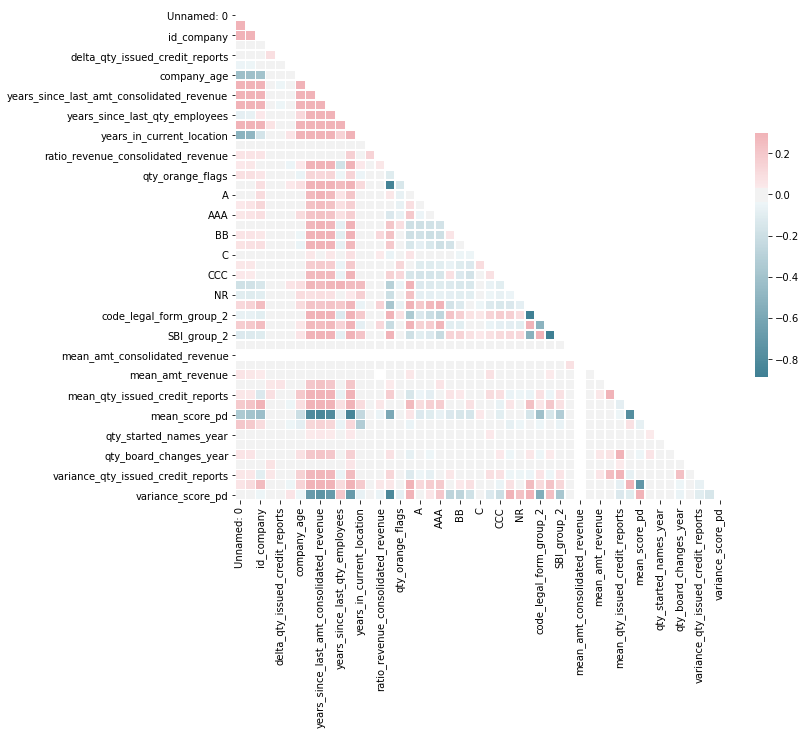

In [8]:

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<a id='remove_columns'></a>

# Limit Number of Features

<a href=#top>Top</a>



Remove some columns with no correlation (b/c it is constant, or categorical...)

In [10]:
# Compute the correlation matrix
corrII_df = data_df.drop(columns=['id_branch', 'Unnamed: 0',
                                  'id_company',
                                  'has_relocated',
                                  'mean_amt_consolidated_revenue',
                                  'mean_amt_revenue'
                                  ]).corr()


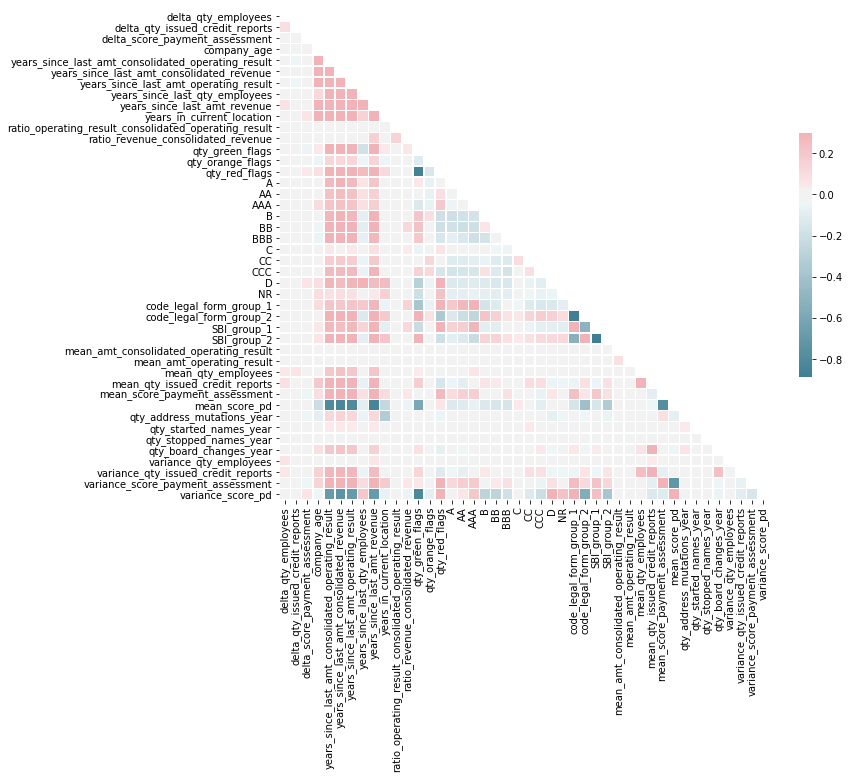

In [11]:

# Generate a mask for the upper triangle
mask = np.zeros_like(corrII_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrII_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<a id='conclusions'></a>
# Conclusions:

- The 'has_relocated' column has some correlation with 'score_payment_assessment' column, and very little correlation with any other column.  
- 'The 'score_pd' and 'has_increased_risk' are highly correlated - perhaps only use one or the other during modelling.
-  There is a strong (negative) correlation between 'perc_credit_limit_adjustment' and 'financial_calamity_outcome'.

<a id='end'></a>

<a href=#top>Top</a>

# End